In [1]:
import pandas as pd
import zipfile
from pathlib import Path

home = Path.home()

# The path to your zip file
filename = "BTCUSDT-1h-2023-08"
zip_filepath = f'{home}/crypto_data/binance/data/spot/monthly/klines/BTCUSDT/1h/{filename}.zip'
csv_filename = f'{filename}.csv'
columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_volume", "taker_buy_quote_volume", "ignore"]

with zipfile.ZipFile(zip_filepath, 'r') as z:
    # Use pandas to read the CSV file directly from the zip file
    with z.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file, header=None, names=columns)

df.head()


,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1690848000000,29232.26,29288.20,29210.99,29283.96,720.85463,1690851599999,2.107947e+07,17954,341.10168,9.975408e+06,0
1,1690851600000,29283.96,29347.16,29169.37,29200.54,973.96678,1690855199999,2.850160e+07,26866,457.28798,1.338138e+07,0
2,1690855200000,29200.53,29218.74,28720.00,28933.22,5165.01282,1690858799999,1.495571e+08,88074,2152.09462,6.230125e+07,0
3,1690858800000,28933.22,28951.12,28813.86,28835.00,1813.18905,1690862399999,5.238132e+07,37227,797.90100,2.305322e+07,0
4,1690862400000,28835.01,28928.34,28803.50,28866.00,1752.08768,1690865999999,5.056954e+07,31403,832.45833,2.402522e+07,0


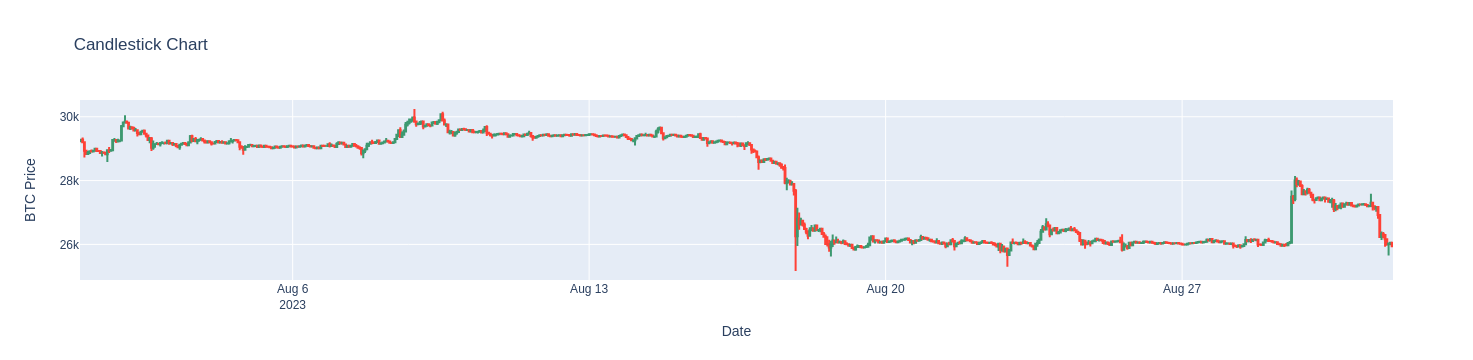

In [4]:
import pandas as pd
import plotly.graph_objects as go

df['date'] = pd.to_datetime(df['open_time'], unit='ms')

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='BTC Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

# Dollar Cost Averaging Method
- Initial Asset is 1,000,000 USDT
## Benchmark 3 strategies
- Invest 30,000 USDT at every 0:00, named A
- Invest 30,000 USDT at every 12:00, named B
- All in the beginning, named C

In [9]:
# Portfolio list
portfolios = []

In [10]:
# Invest 3,0000 USDT at every 0:00
usdt = 1000000
btc = 0
asset = {
    "USDT": [],
    "BTC": [],
    "nav_open": [],
    "nav_high": [],
    "nav_low": [],
    "nav_close": []
}
for index, row in df.iterrows():
    if row['date'].hour == 0:
        btc_price = row['open']
        amount = 30000 / btc_price
        usdt -= 30000
        btc += amount
    asset["USDT"].append(usdt)
    asset["BTC"].append(btc)
    asset["nav_open"].append(btc * row["open"] + usdt)
    asset["nav_high"].append(btc * row["high"] + usdt)
    asset["nav_low"].append(btc * row["high"] + usdt)
    asset["nav_close"].append(btc * row["close"] + usdt)
portfolio = pd.DataFrame(asset)
portfolio["open_time"] = df["open_time"]
portfolios.append(portfolio.copy())
portfolio.tail()


,USDT,BTC,nav_open,nav_high,nav_low,nav_close,open_time
739,70000,33.343339,946671.076932,947576.682025,947576.682025,942354.781671,1693508400000
740,70000,33.343339,942354.781671,943424.102560,943424.102560,937680.712381,1693512000000
741,70000,33.343339,937680.712381,938192.866071,938192.866071,937746.065325,1693515600000
742,70000,33.343339,937746.065325,939351.880542,939351.880542,938726.026065,1693519200000
743,70000,33.343339,938725.692631,938860.399722,938860.399722,934952.226933,1693522800000


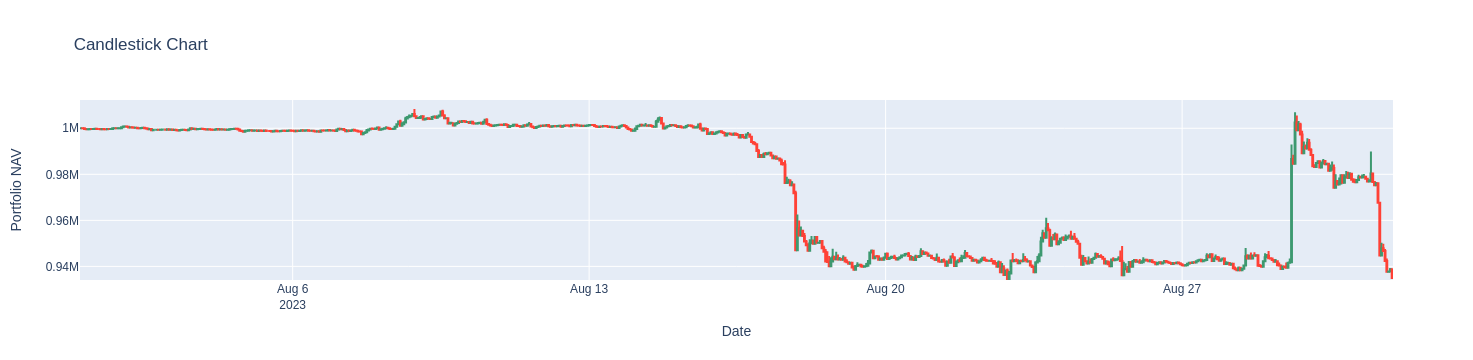

In [11]:
import pandas as pd
import plotly.graph_objects as go

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=portfolio['nav_open'],
                high=portfolio['nav_high'],
                low=portfolio['nav_low'],
                close=portfolio['nav_close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Portfolio NAV',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [14]:
# Invest 30,000 USDT at every 12:00
usdt = 1000000
btc = 0
asset = {
    "USDT": [],
    "BTC": [],
    "nav_open": [],
    "nav_high": [],
    "nav_low": [],
    "nav_close": []
}
for index, row in df.iterrows():
    if row['date'].hour == 12:
        btc_price = row['open']
        amount = 30000 / btc_price
        usdt -= 30000
        btc += amount
    asset["USDT"].append(usdt)
    asset["BTC"].append(btc)
    asset["nav_open"].append(btc * row["open"] + usdt)
    asset["nav_high"].append(btc * row["high"] + usdt)
    asset["nav_low"].append(btc * row["high"] + usdt)
    asset["nav_close"].append(btc * row["close"] + usdt)
portfolio = pd.DataFrame(asset)
portfolio["open_time"] = df["open_time"]
portfolios.append(portfolio.copy())
portfolio.tail()

,USDT,BTC,nav_open,nav_high,nav_low,nav_close,open_time
739,70000,33.417015,948608.187576,949515.793713,949515.793713,944282.354939,1693508400000
740,70000,33.417015,944282.354939,945354.038621,945354.038621,939597.957728,1693512000000
741,70000,33.417015,939597.957728,940111.243084,940111.243084,939663.455078,1693515600000
742,70000,33.417015,939663.455078,941272.818537,941272.818537,940645.581159,1693519200000
743,70000,33.417015,940645.246989,940780.251731,940780.251731,936863.443362,1693522800000


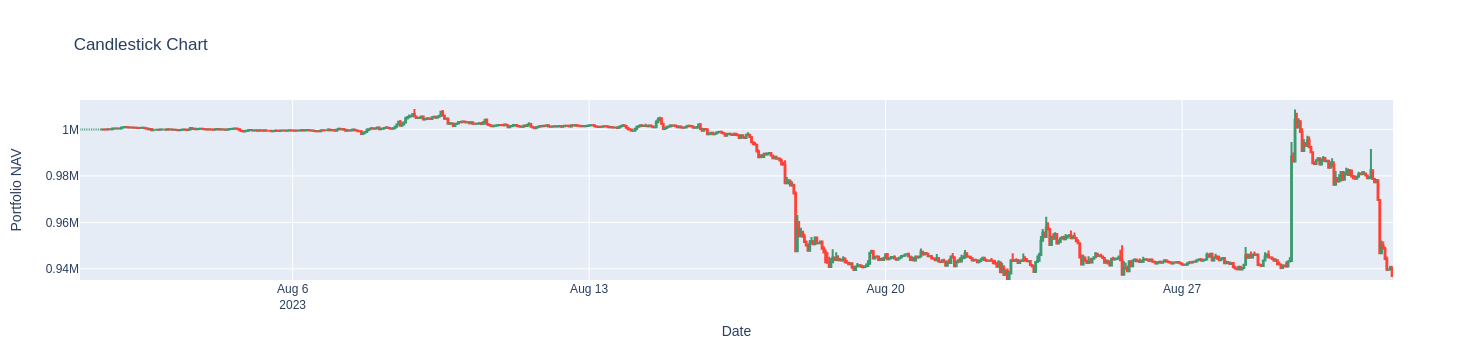

In [15]:
import pandas as pd
import plotly.graph_objects as go

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=portfolio['nav_open'],
                high=portfolio['nav_high'],
                low=portfolio['nav_low'],
                close=portfolio['nav_close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Portfolio NAV',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [16]:
# All in 
usdt = 1000000
btc = 0
asset = {
    "USDT": [],
    "BTC": [],
    "nav_open": [],
    "nav_high": [],
    "nav_low": [],
    "nav_close": []
}
for index, row in df.iterrows():
    if row['date'].day and row['date'].hour == 0:
        btc_price = row['open']
        amount = usdt / btc_price
        usdt -= usdt
        btc += amount
    asset["USDT"].append(usdt)
    asset["BTC"].append(btc)
    asset["nav_open"].append(btc * row["open"] + usdt)
    asset["nav_high"].append(btc * row["high"] + usdt)
    asset["nav_low"].append(btc * row["high"] + usdt)
    asset["nav_close"].append(btc * row["close"] + usdt)
portfolio = pd.DataFrame(asset)
portfolio["open_time"] = df["open_time"]
portfolios.append(portfolio.copy())
portfolio.tail()

,USDT,BTC,nav_open,nav_high,nav_low,nav_close,open_time
739,0,34.208782,899425.497721,900354.608231,900354.608231,894997.170934,1693508400000
740,0,34.208782,894997.170934,896094.246562,896094.246562,890201.783920,1693512000000
741,0,34.208782,890201.783920,890727.230806,890727.230806,890268.833132,1693515600000
742,0,34.208782,890268.833132,891916.328057,891916.328057,891274.229225,1693519200000
743,0,34.208782,891273.887137,891412.090615,891412.090615,887402.479316,1693522800000


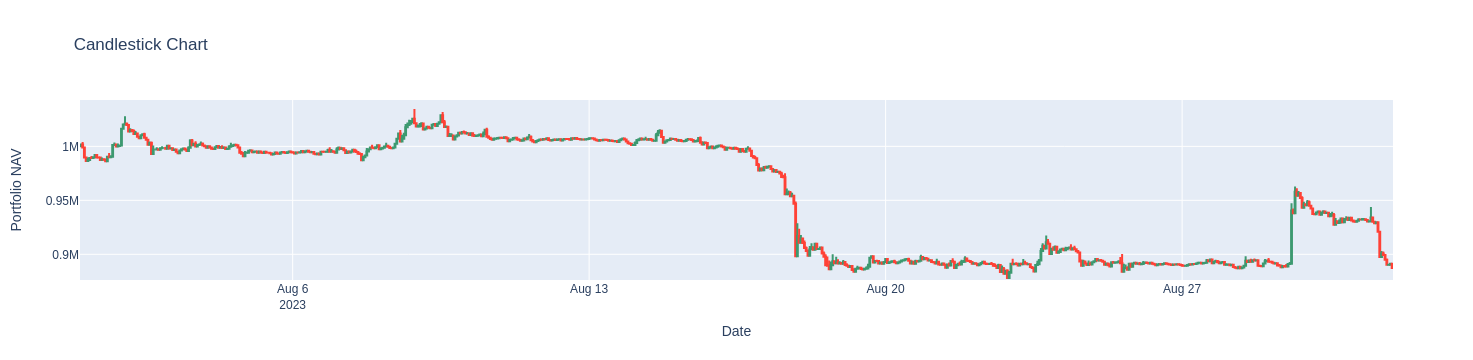

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=portfolio['nav_open'],
                high=portfolio['nav_high'],
                low=portfolio['nav_low'],
                close=portfolio['nav_close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Portfolio NAV',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [18]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np


now = datetime.now()
next_month = now + relativedelta(months=1)
duration_seconds = (next_month - now).total_seconds()
MONTH_IN_MS = duration_seconds * 1000

def monthly_return(df: pd.DataFrame, ts_col: str, nav_col: str):
    r = (df[nav_col][len(df) - 1] - df[nav_col][0]) / df[nav_col][0]
    span = df[ts_col][len(df) - 1] - df[ts_col][0]
    r = r * MONTH_IN_MS / span
    return r

def monthly_volatility(df: pd.DataFrame, ts_col: str, nav_col: str):
    df = df.copy()
    r = monthly_return(df, ts_col, nav_col)
    
    df["log_return"] = np.log(df[nav_col] / df[nav_col].shift(1))
    df['diff'] = df[ts_col].diff()
    df = df.dropna()
    r = np.sum(df['log_return'] * df['diff']) / np.sum(df['diff'])
    df['diff_sq'] = np.power(df["diff"], 2)
    var = (np.power(df["log_return"] - r, 2) * df['diff_sq']).sum() / df['diff_sq'].sum()
    volatility = np.sqrt(var)
    interval = df['diff'].mean()
    volatility = volatility * np.sqrt(MONTH_IN_MS / interval)
    return volatility

def monthly_mdd(df: pd.DataFrame, nav_col: str):  # Monthly is non-necessary
    cumulative_max = df[nav_col].cummax()
    drawdown = cumulative_max - df[nav_col]
    drawdown_percentage = drawdown / cumulative_max
    max_drawdown = drawdown_percentage.max()
    return max_drawdown

def monthly_shape_ratio(df: pd.DataFrame, ts_col, nav_col):
    r = monthly_return(df, ts_col, nav_col)
    v = monthly_volatility(df, ts_col, nav_col)
    return r / v
    

r = monthly_return(portfolio, "open_time", "nav_close")
print(f"Monthly return: {r:.4f}")

v = monthly_volatility(portfolio, "open_time", "nav_close")

print(f"Monthly volatility: {v:.4f}")

mdd = monthly_mdd(portfolio, "nav_close")

print(f"Monthly MDD: {mdd:.4f}")

sr = monthly_shape_ratio(portfolio, "open_time", "nav_close")

print(f"Monthly Sharpe Ratio: {sr:.4f}")

Monthly return: -0.1143
Monthly volatility: 0.1116
Monthly MDD: 0.1465
Monthly Sharpe Ratio: -1.0247


In [165]:
for i, p in enumerate(portfolios):
    print(f"Portfolio {i}")
    r = monthly_return(p, "open_time", "nav_close")
    print(f"Monthly return: {r:.4f}")

    v = monthly_volatility(p, "open_time", "nav_close")
    print(f"Monthly volatility: {v:.4f}")

    mdd = monthly_mdd(p, "nav_close")
    print(f"Monthly MDD: {mdd:.4f}")

    sr = monthly_shape_ratio(p, "open_time", "nav_close")
    print(f"Monthly Sharpe Ratio: {sr:.4f}\n")

Portfolio 0
Monthly return: -0.0065
Monthly volatility: 0.0071
Monthly MDD: 0.0074
Monthly Sharpe Ratio: -0.9108

Portfolio 1
Monthly return: -0.0063
Monthly volatility: 0.0071
Monthly MDD: 0.0073
Monthly Sharpe Ratio: -0.8844

Portfolio 2
Monthly return: -0.1142
Monthly volatility: 0.1116
Monthly MDD: 0.1465
Monthly Sharpe Ratio: -1.0233



In [27]:
portfolio[['open_time', 'nav_open']].tail(5).to_dict()

{'open_time': {739: 1693508400000,
  740: 1693512000000,
  741: 1693515600000,
  742: 1693519200000,
  743: 1693522800000},
 'nav_open': {739: 899425.497720669,
  740: 894997.1709337562,
  741: 890201.7839195465,
  742: 890268.8331316157,
  743: 891273.8871370193}}